<img style="float: left; margin-right: 15px;" src="https://static.wixstatic.com/media/eb5ac6_9cb60a2115154c98a195fac7a0e7124a~mv2.png/v1/fill/w_506,h_322/logo.png" height=100 width=200>

The objective of this notebook is to conduct a feasibility study to evaluate the possibility of classifying automatically consumer goods. The data given are descriptions, images and products categories for each item. The model uses opencv to get descriptors, then use unsupervised classification to create bag of visual words. Then, the predictions are performed and compared with different standards machine learning classifiers.<br><br>

<div style="text-align: right"> A Data Scientist student project. </div>

<h1> Introduction <span class="tocSkip"></span></h1> <br>

The firm 'Place de Marché' wants to launch a high scale marketplace. In order to help sellers to add products to the marketplace, it is asked to automatize products recognition. The feature to recognize is the main category of the product, important to place it in a categorical tree. The features given are a text description, and an image. We don't want here to do all process or implement the final application, but just make a study case of feasibility and give the methodology. The tests have to be executed with their database provided through <span style="color:green"> [1] </span>. <br>

The notebook starts with a quick check over the table given, the data quality, and a selection of the useful features. As the categories to find are in a categorical tree, we look at distributions over this feature to select the categorical precision we can test. Thus, we do a image preprocessing, such as re-scaling, auto-contrast, equalization, before splitting our data set into training set and testing set. The product classification is done with bag of words for the text and bag of visual words for the images. We try two methods to create text bags, using stop-words and doing a term frequency–inverse document frequency algorithm. For the image recognition, we compare three methods, SIFT, SURF and ORB search descriptors combined with an unsupervised clustering. The predictions are done with several methods such as K-nearest neighbors, logistic regressor, random forest classifier, naives bayes and neural network.

<span style="color:green"> [1] </span> https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip <br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cleaning</a></span><ul class="toc-item"><li><span><a href="#Loading-data-and-visual-inspection-of-the-data." data-toc-modified-id="Loading-data-and-visual-inspection-of-the-data.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading data and visual inspection of the data.</a></span></li><li><span><a href="#Data-quality-checks" data-toc-modified-id="Data-quality-checks-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data quality checks</a></span></li><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature selection</a></span></li></ul></li><li><span><a href="#Data-selection" data-toc-modified-id="Data-selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data selection</a></span><ul class="toc-item"><li><span><a href="#Classification-tree" data-toc-modified-id="Classification-tree-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Classification tree</a></span></li><li><span><a href="#Uploading-images" data-toc-modified-id="Uploading-images-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Uploading images</a></span></li></ul></li><li><span><a href="#Image-Preprocessing" data-toc-modified-id="Image-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Image Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Image-rescaling" data-toc-modified-id="Image-rescaling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Image rescaling</a></span></li><li><span><a href="#Autocontrast" data-toc-modified-id="Autocontrast-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Autocontrast</a></span></li><li><span><a href="#Image-equalize" data-toc-modified-id="Image-equalize-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Image equalize</a></span></li></ul></li><li><span><a href="#Training-and-testing-set" data-toc-modified-id="Training-and-testing-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training and testing set</a></span></li><li><span><a href="#Creation-of-the-bag-of-Words" data-toc-modified-id="Creation-of-the-bag-of-Words-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creation of the bag of Words</a></span><ul class="toc-item"><li><span><a href="#Bag-of-words-removing-stopwords" data-toc-modified-id="Bag-of-words-removing-stopwords-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Bag of words removing stopwords</a></span></li><li><span><a href="#Bag-of-words-with-TF-IDF" data-toc-modified-id="Bag-of-words-with-TF-IDF-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Bag of words with TF-IDF</a></span></li></ul></li><li><span><a href="#Creation-of-the-Bag-Of-Visual-Image" data-toc-modified-id="Creation-of-the-Bag-Of-Visual-Image-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Creation of the Bag Of Visual Image</a></span><ul class="toc-item"><li><span><a href="#SIFT-/-SURF-/-ORB-Image-feature-detecting" data-toc-modified-id="SIFT-/-SURF-/-ORB-Image-feature-detecting-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>SIFT / SURF / ORB Image feature detecting</a></span></li><li><span><a href="#K-means-to-create-a-Bag-of-Features" data-toc-modified-id="K-means-to-create-a-Bag-of-Features-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>K-means to create a Bag of Features</a></span></li></ul></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predictions</a></span><ul class="toc-item"><li><span><a href="#KNN" data-toc-modified-id="KNN-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Logistic-regressor" data-toc-modified-id="Logistic-regressor-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Logistic regressor</a></span></li><li><span><a href="#Random-forest-classifier" data-toc-modified-id="Random-forest-classifier-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Random forest classifier</a></span></li><li><span><a href="#GaussianNB-Naives-bayes" data-toc-modified-id="GaussianNB-Naives-bayes-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>GaussianNB Naives bayes</a></span></li><li><span><a href="#Neural-network" data-toc-modified-id="Neural-network-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Neural network</a></span></li></ul></li><li><span><a href="#Get-further-with-ebay-API" data-toc-modified-id="Get-further-with-ebay-API-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Get further with ebay API</a></span></li></ul></div>

 <font size="+2"> <b> Loading packages </b></font>

In [1]:
# Array packages
import numpy as np
import pandas as pd
# Graphic packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
# Image treatmment packages
from PIL import Image, ImageOps, ImageFilter
import cv2
from resizeimage import resizeimage
# Text treatment packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn import decomposition
from MulticoreTSNE import MulticoreTSNE as TSNE
# ML Regressor and classifier packages
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
# Mathematical and chain operation packages
from math import *
import datetime
import re
# Html display packages
from IPython.display import HTML
from IPython.display import display
# File packages
from pathlib import Path
import importlib
# Ebay API packages and image url reading 
from ebaysdk.exception import ConnectionError
from ebaysdk.finding import Connection
import requests

pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', 60)
import warnings
warnings.simplefilter(action='ignore')

In [2]:
baseCodeHide="""
<style>
.button {
    background-color: #000000;;
    border: none;
    color: white;
    padding: 8px 22px;
    display: inline-block;
    text-align: center;
    text-decoration: none;
    font-size: 16px;
    margin: 4px 2px;
    cursor: pointer;
}
.button_print {
    background-color: #008CBA;;
    border: none;
    color: black;
    padding: 1px 1px;
    display: inline-block;
    text-align: center;
    text-decoration: none;
    font-size: 14px;
    margin: 4px 2px;
    cursor: pointer;
}
</style>
 <script>
   var divTag1 = document.getElementsByClassName("input")[1]
   divTag1.style.display = 'none';
 
   function toggleInput(i) { 
      var divTag = document.getElementsByClassName("input")[i]
      var displaySetting = divTag.style.display;
     
      if (displaySetting == 'block') { 
         divTag.style.display = 'none';
       }
      else { 
         divTag.style.display = 'block';
       } 
  }  
  </script>
"""
h=HTML(baseCodeHide)
display(h)

# Cleaning

In order to use properly the images and descriptions without surprises, a first step is a quick cleaning and overview of the data. We load, inspect the columns, checks the possible errors, then keep only the features we need.

## Loading data and visual inspection of the data.

We load the data from the link https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip. The compressed file with the pictures has a total size of 345,1 Mb. The unique data set is stored under the name flipkart_com-ecommerce_sample_1050.csv. To use this notebook, the files are put in a folder 'input' and there the images are left in the folder 'Images'. We now upload the table.

In [3]:
data = pd.read_csv("input/flipkart_com-ecommerce_sample_1050.csv")

Let's have a look to the first rows of the data set to get an idea of the content.

In [4]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


We can relate the following information:

- datetimes variables
- float values for the prices
- cardinal variables for the urls, names, categories and descriptions
- variables with nan representing missing values
- ID variables

Let's look at the number of rows and columns in the set.

In [5]:
data.shape

(1050, 15)

There are 15 columns. For the 1050 rows, we can plot the column names, type and number of non null values.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
uniq_id                    1050 non-null object
crawl_timestamp            1050 non-null object
product_url                1050 non-null object
product_name               1050 non-null object
product_category_tree      1050 non-null object
pid                        1050 non-null object
retail_price               1049 non-null float64
discounted_price           1049 non-null float64
image                      1050 non-null object
is_FK_Advantage_product    1050 non-null bool
description                1050 non-null object
product_rating             1050 non-null object
overall_rating             1050 non-null object
brand                      712 non-null object
product_specifications     1049 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 116.0+ KB


Quite all values are present in the table. Only brand has closed to one over third values missing. We check now if there are duplicates between the rows. For this we search the possible primary keys.

In [7]:
key = [col for col in data.columns if len(data[col].unique()) == len(data[col])]
print("primary key(s) for the table : {}".format(key))

primary key(s) for the table : ['uniq_id', 'product_url', 'product_name', 'pid', 'image', 'description']


There are no duplicates between  the rows. The primary key is 'uniq_id', but we can also relate unique *product_url*, *product_name*, *pid*, *image* and *description* for each row.

## Data quality checks
We now have a look at the different columns separately to see if there are any wrong value type. The columns where we check the values are ordinal values. 

<font size="+1"> <b> Numeric values </b></font>

The ordinal values are checked with a possible range accordingly to their physical meaning. Here the values are prices, so they have to be numeric and positive.

In [8]:
def check_numeric(df, cols, minval=None, maxval=None):
    """ Transform values into numeric values and checks if a condition is good. 
    
    Take a list of columns of 'df' DataFrame and apply the 'to_numeric' function
    on its values. If a value can't be converted into float or integer, it will 
    be set to NaN. Then, if the minval and/or maxval, are specified, for the 
    minimum value and the maximum value allowed, the condition is applied. 
    If the value is not in the range given, it will be displayed.
    
    """
    
    for col in cols:
        # Checks the number of non numeric values, replace them to NaN
        nb_good = sum(~df[col].isnull())
        df[col] = df[col].apply(pd.to_numeric, errors='coerce')
        nb_good_new = (~df[col].isnull()).sum()
        wrong_type = nb_good - nb_good_new
            
        # Checks the range condition for the value 
        if minval is not None and maxval is not None:
            condition = (df[col] < minval) & (df[col] > maxval)
        elif minval is not None and maxval is None:
            condition = (df[col] < minval)
        elif minval is None and maxval is not None:
            condition = (df[col] > maxval)
        else:
            condition = []

        # Compute and print the result 
        if sum(condition) != 0:
            wrong_val = df.loc[condition, col].values
            wrong_index = df.loc[condition].index.values
            print("There are {} wrong types values, and the {} wrongs range \
values for \'{}\' are : {} {}"
            .format(wrong_type, len(wrong_val), col, wrong_index, wrong_val))
        else:
            print("There are {} wrong types values and 0 wrong range values \
for \'{}\'.".format(wrong_type, col))

In [9]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[7].style.display = 'none';  
   document.getElementsByClassName("input")[8].style.display = 'none';
</script>"""))

In [10]:
check_numeric(data, ["discounted_price", "retail_price"], minval=0)

There are 0 wrong types values and 0 wrong range values for 'discounted_price'.
There are 0 wrong types values and 0 wrong range values for 'retail_price'.


<font size="+1"> <b> Url values </b></font>

The url values has to begin with http:// or https:// and can be followed bycaracters without : / _ . + ' ( ) " * $ - <br>

In [11]:
def check_urls(df, cols):
    """ Transform values into string values and checks if the url format is good. 
    
    Take a list of columns of 'df' DataFrame and apply the 'string' function
    on its values. Then, we check the condition to see if the value has a good
    url format. A good one begin by 'http://'' or 'https://'' and can be 
    followed by caracters without : / _ . + ' ( ) " * $ - 
    If has not the good format, it will be displayed with its index.
    
    """
    
    # Form the re expression
    expression = r"^https?://(([A-Za-z0-9])*-*_*.*\+*\'*\(*\)*\"*/*)*$"

    for col in cols:
        # Force values into string
        df[col] = df[col].apply(str)
            
        # Check all the values    
        wrong_val = []
        wrong_index = []     
        for ind in df[col].index:
            chain = df.loc[ind, col]

            # Search wrong urls
            if re.search(expression, chain) is None:
                wrong_val.append(chain)
                wrong_index.append(ind)
    
        # Print the final number of good and wrong values
        if len(wrong_index) != 0:
            print("The {} wrongs format values for \'{}\' are : {} {}"
            .format(len(wrong_val), col, wrong_index, wrong_val))
        else:
            print("There are 0 wrong format values for \'{}\'.".format(col))

In [12]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[10].style.display = 'none'; 
   document.getElementsByClassName("input")[11].style.display = 'none';
</script>"""))

In [13]:
check_urls(data, ["product_url"])

There are 0 wrong format values for 'product_url'.


<font size="+1"> <b> Image exists </b></font>

We now check if the images exist in the folder downloaded with the csv file.

In [14]:
missing = False
for ind in data.index:
    file_name = "input/Images/" + str(data.loc[ind, "image"])
    path = Path(file_name) 
    if not path.is_file():
        print("The image {} with index {} is missing"
              .format(data.loc[ind, "image"], ind))
        missing = True
if not missing:
    print("There are 0 missing images")

There are 0 missing images


## Feature selection

Our objective is to determine the product category with only the image and the text description. We keep *uniq_id* value as primary key to identify the products. Then we drop all columns excepts *image*, *description*, and *product_category_tree*. As we store later the total images loaded into the table, we rename the columns *image* into *image_name*. The column *product_category_tree* is renamed into *category* for a simpler use.

In [15]:
data = data[["uniq_id", "image", "description", "product_category_tree"]]
data = data.rename(columns={"image":"image_name"})
data = data.rename(columns={"product_category_tree":"category"})

With this new selection, we can check the missing values in the table :

In [16]:
print("Total values : {}".format(len(data)))
for col in data.columns:
    nb_false = (data[col].isnull()).sum()
    print("Missing values for \'{}\' : {} ({:.1f}%), unique values : {}"
          .format(col, nb_false, (nb_false / len(data)) * 100, 
                  len(data[col].unique())))

Total values : 1050
Missing values for 'uniq_id' : 0 (0.0%), unique values : 1050
Missing values for 'image_name' : 0 (0.0%), unique values : 1050
Missing values for 'description' : 0 (0.0%), unique values : 1050
Missing values for 'category' : 0 (0.0%), unique values : 642


There are no missing values in the table. More than half of the table has unique categories. The few amount of data for each category can make some problems to learn the categories features with the learning machine modules. This is why it is important to look now on the categorical column.

# Data selection

## Classification tree

We display one of the values to have an idea of the structure of the field.

In [17]:
pd.set_option('display.max_colwidth', -1)
data.loc[0, "category"]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

The values are listed with one string with different level of categories. Each of them are separated with '>>'. We noticed there are a lot of categories compared to our 1050 images. We can see the different level of categories. For each value we compute the number of the maximum levels. We print the unique numbers.

In [18]:
cat_depth = []
for ind in data.index:
    cat_depth.append(len(data.loc[ind, "category"]\
                         .split("\"")[1].split(" >> ")))
np.unique(cat_depth)

array([2, 3, 4, 5, 6, 7])

Some values has only two categories, and some other can have up to 7. We can see the histogram of the maximal branch depth of each product on the categorical tree. 

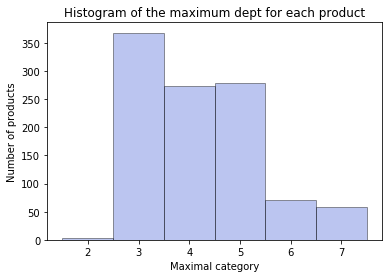

In [19]:
color = sns.color_palette("hls", 8)
sns.distplot(np.concatenate((cat_depth, [8])), bins=6, color=color[5], 
             kde=False, hist_kws={'edgecolor':'black'})
plt.xticks(np.arange(2, 8) + 0.5, np.arange(2, 8))
plt.title("Histogram of the maximum dept for each product")
plt.xlabel("Maximal category")
plt.ylabel("Number of products")
plt.show()

In [20]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[18].style.display = 'none'; 
   document.getElementsByClassName("input")[19].style.display = 'none';  

</script>"""))

Most of the distribution has a maximum depth in the category tree from 3 to 5

It is evident we have to cut the different categories keeping only the most important levels.  We separate here the different levels of categories, and we add associated columns in the main dataframe. For some products the category 7 for example will be without value if the tree doesn't go that far.

In [21]:
# Creates sub categories from 1 to 7 and splits the main category string
categories = ["cat1", "cat2", "cat3", "cat4", "cat5", "cat6", "cat7"]

for ind in data.index:
    length = len(data.loc[ind, "category"].split("\"")[1].split(" >> "))
    
    for i, cat in enumerate(categories):
        if i <= 1:
            data.loc[ind, cat] = data.loc[ind, "category"].split("\"")[1]\
            .split(" >> ")[i]
    
        if i + 1 <= length:
            data.loc[ind, cat] = data.loc[ind, "category"].split("\"")[1]\
            .split(" >> ")[i]  

We look at different distribution to see what appends if we decide to take not seven levels, but less. All the products with more levels are truncated from one threshold, and the one with no sufficiently precise category tree are removed.

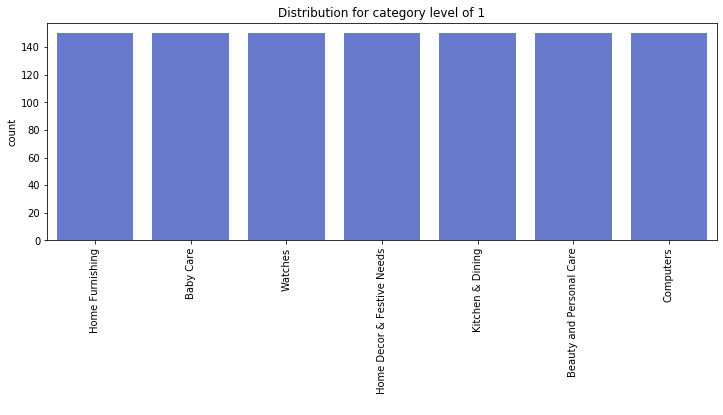

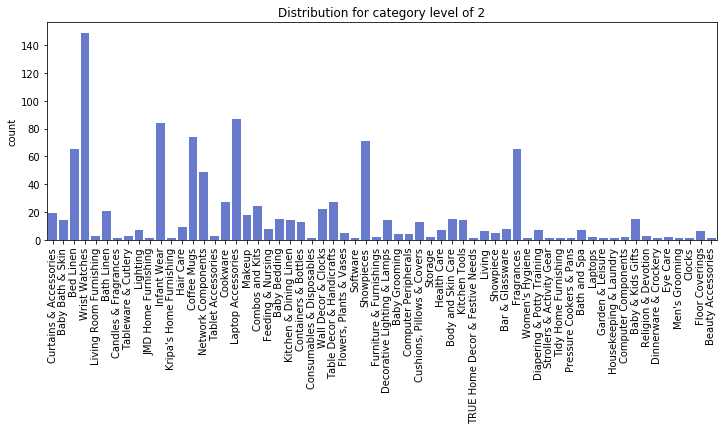

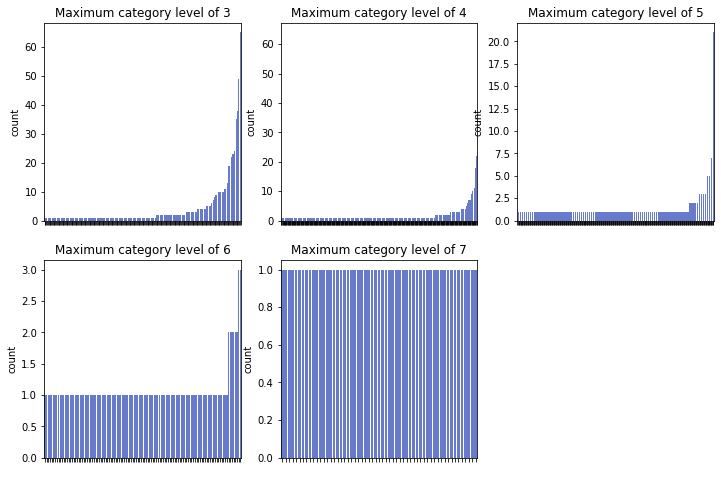

In [22]:
# 2 first histograms with few columns
for i in [1, 2]:
    plt.figure(figsize = (12, 4))
    plt.xticks(rotation=90)
    plt.title("Distribution for category level of {}".format(i))
    sns.countplot(data["cat" + str(i)], color=color[5])
    plt.xlabel(" ")
    plt.show()

# Histograms with much more columns
plt.figure(figsize = (12, 8))        
for i in np.arange(3, len(np.unique(cat_depth)) + 2):
    plt.subplot(2, 3, i - 2)
    plt.title("Maximum category level of {}".format(i))
    sns.countplot(data["cat" + str(i)], color=color[5], 
                    order=data["cat" + str(i)].value_counts()
                    .sort_values().index)
    frame = plt.gca()
    frame.axes.xaxis.set_ticklabels([])
    plt.xlabel(" ")
plt.show()

In [23]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[21].style.display = 'none';  
   document.getElementsByClassName("input")[22].style.display = 'none';  
</script>"""))

We can see that for the huger values of depth, there are quite always only one picture per category. We also think it is important to have more than 10 images per categories to learn with a sufficient precision. For that we check this time what happens if we remove all categories with less than 10 images. We count the number of categories and images left for each levels. 

In [24]:
cnt_cat = []
cnt_img = []
for cat in categories:
    unique, counts = np.unique(data[cat].dropna(), return_counts=True)
    cnt_cat.append((counts >= 10).sum())
    cnt_img.append(counts[counts >= 10].sum())

We plot this time the total number of images still in the set, for each category level.

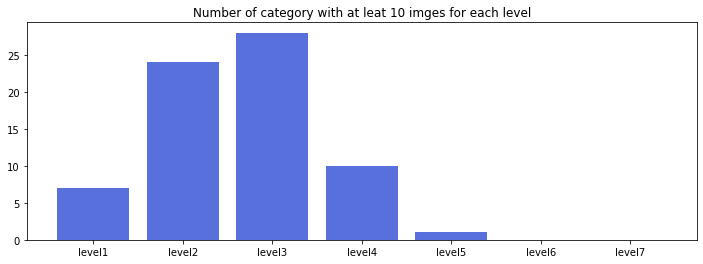

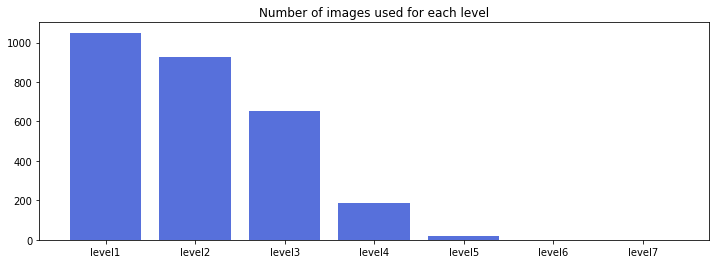

In [25]:
plt.figure(figsize = (12, 4))
plt.xticks(range(7), ['level' + str(i) for i in range(1, 8)])
plt.title("Number of category with at leat 10 imges for each level")
plt.bar(range(7), cnt_cat, color=color[5])
plt.show()

plt.figure(figsize = (12, 4))
plt.xticks(range(7), ['level' + str(i) for i in range(1, 8)])
plt.title("Number of images used for each level")
plt.bar(range(7), cnt_img, color=color[5])
plt.show()

In [26]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[24].style.display = 'none';  
   document.getElementsByClassName("input")[25].style.display = 'none'; 
</script>"""))

We can see that if we truncate the tree from the level 3 and keep categories with at least 10 images, it will remain 28 categories and close to 600 images. This is not much, but the risk with a cut at lower levels is to have too general categories. It could be really hard to find features describing them. We keep the threshold to level 3. For that, we remove all part of tree up to level 3, remove all products where the tree goes not that far, and we also remove the categories with no more than 10 images.

In [27]:
data = data.dropna(subset=(["cat1", "cat2", "cat3"]))
data["cat2use"] = data["cat1"] + data["cat2"] + data["cat3"]
unique, count = np.unique(data["cat2use"], return_counts=True)
for cat in unique[count < 10]:
    data.drop(data.loc[data["cat2use"] == cat].index, inplace=True)
data = data.reset_index()
data = data.drop("index", axis=1)

In [28]:
data.shape

(653, 12)

## Uploading images

We can now upload all the images in our main DataFrame from the files.

In [29]:
Image.MAX_IMAGE_PIXELS = 1000000000 
for ind in data.index:
    temp = Image.open("input/Images/" + data.loc[ind, "image_name"])
    img = temp.copy()
    data.loc[ind, "image"] = "0"
    data.loc[ind, "image"] = img
    temp.close()

And then check the mode :

In [30]:
img1 = data.loc[0, "image"]
print("Mode : {}".format(img1.mode))

Mode : RGB


The images are stored in RGB mode. That means we have three values for each pixel, one representing the amount of red, one the green, the last one the blue. 

# Image Preprocessing

We do then a preprocessing to make the image feature more recognizable and to reduce the machine execution time. For that we re-scale images, correct the contrast, and equalize the pictures.

## Image rescaling

All the images have different sizes. We calculate the square of the total amount of pixel for each image.

In [31]:
# Store the sizes
sizes = []
for ind in data.index:
    img = data.loc[ind, "image"]
    sizes.append([img.size[0], img.size[1]])
    
sqare_size = np.sqrt(np.array(sizes)[:, 0] * np.array(sizes)[:, 1])

For a better view we plot the histogram of the distribution.

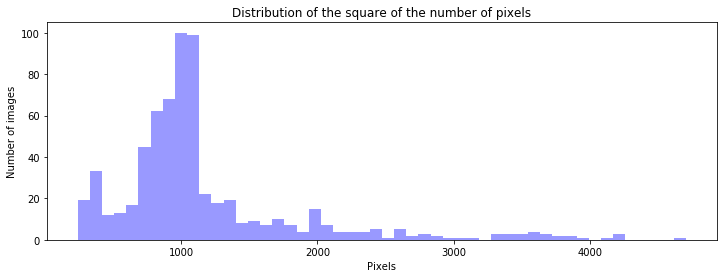

In [32]:
# Plot histogram
plt.figure(figsize=(12, 4))
sns.distplot(sqare_size, color='b', kde=False)
plt.title("Distribution of the square of the number of pixels")
plt.xlabel("Pixels")
plt.ylabel("Number of images")
plt.show()

In [33]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[31].style.display = 'none';  
   document.getElementsByClassName("input")[32].style.display = 'none';  
</script>"""))

Most of the distribution has a size between 500 and 2000 square pixel, but we can find some big one with a size close to 4 000 square pixel.

In [34]:
print("The minimum size is {} square pixel".format(int(min(sqare_size))))
print("The maximum size is {} square pixel".format(int(max(sqare_size))))

The minimum size is 240 square pixel
The maximum size is 4703 square pixel


The sizes can be really different. In order to re-scale and re-size them with the same value we have to find the main ratio between length and width to maintain it:

In [35]:
mean_ratio = (np.array(sizes)[:, 0] / np.array(sizes)[:, 1]).mean()
mean_ratio

1.0389204031970098

The ratio appears to be really close to one. We still use the ratio 1,04 to automatize the method for possible other data set. We would like to reduce the size of the images to gain computation time. For a base width of 100 pixels, the length will be 104.

Let's take an image as an example and see the size:

In [36]:
image_path_example = "input/Images/" + data.loc[1, "image_name"]
img = Image.open(image_path_example) 

In [37]:
img.size

(2388, 1293)

We re-scale it with a shape of (104, 100). Instead of compressing the part too long or large, deforming the image, we prefer to add a white band to complete the rectangular image. This forms a quite square one, keeping the ratio of 1,02.

In [38]:
# if the picture is not square, fill with white stuff
fill_color=(255, 255, 255, 0)
x, y = img.size

if x / mean_ratio < y:
    size_x = int(y * mean_ratio)
    size_y = y
else:
    size_x = x
    size_y = int(x / mean_ratio)
new_im = Image.new('RGB', (size_x, size_y), fill_color)
new_im.paste(img, (int((size_x - x) / 2), int((size_y - y) / 2)))
img2 = new_im

# rescaling
width = 100
img3 = resizeimage.resize_cover(img2, [width * mean_ratio, width])

We plot here the different images we got during the process.

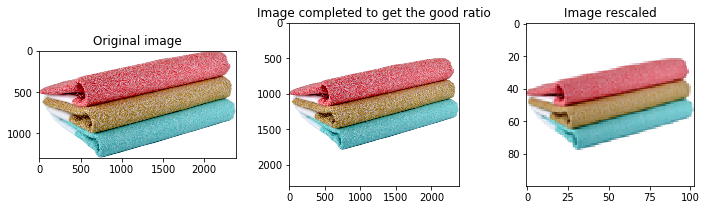

In [39]:
# Plot original picture
fig = plt.figure(figsize=(12, 3))
ax1 = fig.add_subplot(131)
ax1.title.set_text('Original image')
ax1.imshow(img)

# Completed
ax2 = fig.add_subplot(132)
ax2.title.set_text('Image completed to get the good ratio')
ax2.imshow(img2)

# Rescaled
ax3 = fig.add_subplot(133)
ax3.title.set_text('Image rescaled')
ax3.imshow(img3)

plt.show()

In [40]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[38].style.display = 'none';
   document.getElementsByClassName("input")[39].style.display = 'none'; 
</script>"""))

In [41]:
img3.size

(103, 100)

Due to small rounding of the values we obtain the final size. We can see the loss of precision during the process.

## Autocontrast

As some picture can be really exposed or underexposed, it is good to correct them. we use the auto-contrast method from ImageOps library.

In [42]:
img4 = ImageOps.autocontrast(img3)

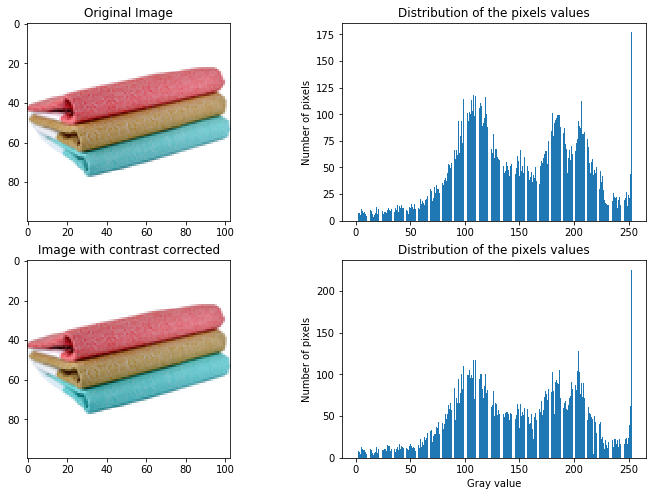

In [43]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax1.title.set_text('Original Image')
ax1.imshow(img3)

ax2 = fig.add_subplot(222)
ax2.title.set_text('Distribution of the pixels values')
hist, bins = np.histogram(np.array(img3).flatten(), bins=255)
ax2 = plt.bar(range(len(hist[0:254])), hist[0:254])
plt.xlabel("")
plt.ylabel("Number of pixels")

ax3 = fig.add_subplot(223)
ax3.title.set_text('Image with contrast corrected')
ax3.imshow(img4)

ax4 = fig.add_subplot(224)
ax4.title.set_text('Distribution of the pixels values')
hist, bins = np.histogram(np.array(img4).flatten(), bins=255)
ax4 = plt.bar(range(len(hist[0:254])), hist[0:254])
plt.xlabel("Gray value")
plt.ylabel("Number of pixels")
plt.show()

In [44]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[42].style.display = 'none';  
   document.getElementsByClassName("input")[43].style.display = 'none';  
</script>"""))

The pixels values are now spread over all the gray spectrum.

## Image equalize

We also equalize the spectrum to remove the possible gray values with too much pixels concerned compared to the other.

In [45]:
img5 = ImageOps.equalize(img4)

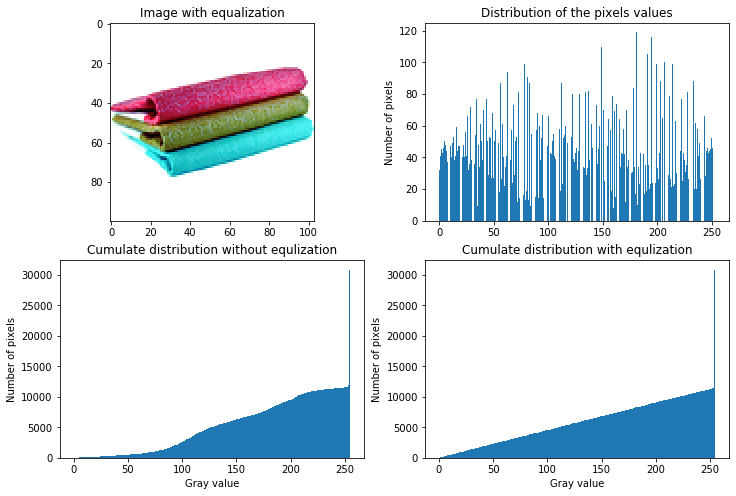

In [46]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax1.title.set_text('Image with equalization')
ax1.imshow(img5)

ax2 = fig.add_subplot(222)
ax2.title.set_text('Distribution of the pixels values')
hist, bins = np.histogram(np.array(img5).flatten(), bins=255)
ax2 = plt.bar(range(len(hist[0:254])), hist[0:254])
plt.xlabel("")
plt.ylabel("Number of pixels")

ax3 = fig.add_subplot(223)
ax3.title.set_text('Cumulate distribution without equlization')
ax3.hist(np.array(img4).flatten(), bins=255, cumulative=True)
plt.xlabel("Gray value")
plt.ylabel("Number of pixels")

ax4 = fig.add_subplot(224)
ax4.title.set_text('Cumulate distribution with equlization')
ax4.hist(np.array(img5).flatten(), bins=255, cumulative=True)
plt.xlabel("Gray value")
plt.ylabel("Number of pixels")
plt.show()

In [47]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[45].style.display = 'none';  
   document.getElementsByClassName("input")[46].style.display = 'none';  

</script>"""))

We can have an overview of the transformations with the original image, the last image, and the difference between the original re-scaled and the final.

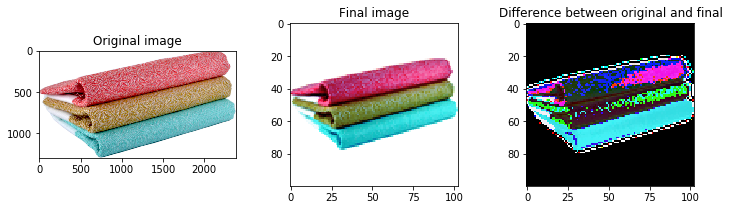

In [48]:
fig = plt.figure(figsize=(12, 3))
ax1 = fig.add_subplot(131)
ax1.title.set_text('Original image')
ax1.imshow(img)

ax2 = fig.add_subplot(132)
ax2.title.set_text('Final image')
ax2.imshow(img5)

ax3 = fig.add_subplot(133)
ax3.title.set_text('Final image with noise removed')
ax3.title.set_text("Difference between original and final")
ax3.imshow(np.array(img3) - np.array(img5))

plt.show()

In [49]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[47].style.display = 'none';  
   document.getElementsByClassName("input")[48].style.display = 'none'; 
</script>"""))

<font size="+1"> <b> Process with all images </b></font>

We can do the same treatment for all pictures.

In [50]:
for ind in data.index:
    img = data.loc[ind, "image"]

    x, y = img.size
    if x / mean_ratio < y:
        size_x = int(y * mean_ratio)
        size_y = y
    else:
        size_x = x
        size_y = int(x / mean_ratio)
    new_im = Image.new('RGB', (size_x, size_y), (255, 255, 255, 0))
    new_im.paste(img, (int((size_x - x) / 2), int((size_y - y) / 2)))
    img = new_im
    img = resizeimage.resize_cover(img, [width * mean_ratio, width])
    img = ImageOps.autocontrast(img)
    img = ImageOps.equalize(img)
    data.loc[ind, "image"] = img

# Training and testing set

In order to make a good prediction of the categorical model, we split our data set in two parts. One is used to learn the features of the pictures and categories. The other is used to quantify the error of the model found. We take 80% of the data for the training test and 20% for the testing. We use the stratified kfold on the category column to keep an minimum amount of images in each set.

In [51]:
xtrain, xtest = train_test_split(data, random_state=1, stratify=data["cat2use"])

data_test = data.loc[xtest.index]
data_test = data_test.reset_index()
data_test = data_test.drop("index", axis=1)

data = data.loc[xtrain.index]
data = data.reset_index()
data = data.drop("index", axis=1)

# Creation of the bag of Words

We take each text, do a cleaning such as removing punctuation, changing words case, and lemmatize them. Then, We create bags of words with for each text the proportion of words. We use here the nltk library. If it doesn't work, install throught the command line "nltk.download()". We use two different methods to make the bag, so there will be two bags of words.

## Bag of words removing stopwords

The first method will consist in removing the most common english word from a dictionary, as the determinant, conjunction... We can see some of those values

In [52]:
# Take the common english words
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))
list(stopWords)[0:10]

[nltk_data] Downloading package stopwords to /home/millet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['herself',
 'very',
 'mustn',
 'don',
 "hasn't",
 'of',
 'have',
 'most',
 'why',
 'who']

In [53]:
# Takes the descriptions in an unique array.
text = data["description"].values

To see the modification we can use a text example.

In [54]:
text[14]

"Specifications of Rishan Printed Baby Boy's V-neck T-Shirt T-shirt Details Sleeve Full Sleeve Number of Contents in Sales Package Pack of 1 Fabric Cotton Type V-neck Fit Regular General Details Pattern Printed Occasion Casual Ideal For Baby Boy's In the Box 1 T Shirt Additional Details Style Code RISHAK-FSP-14 Fabric Care do not wring,do not use hot water,do not restitch"

We lower the cases, separate dots from the words, and removed the common words

In [55]:
nltk.download('punkt')
expr = r"[0-9]+"
for i, desc in enumerate(text):
    # Some words are directly joined with a dot, they are considered as one word 
    desc = desc.replace(".", "") 
    desc = desc.replace(",", "") 
    desc = desc.replace("'", "")
    # Replace the string into list of string words
    words = word_tokenize(desc)
    # Remove all words in the stopWords set
    text_cleaned = []
    for w in words:
        w = w.lower()
        if w not in stopWords and re.search(expr, w) is None and len(w) > 1:
            text_cleaned.append(w)
    text[i] = ' '.join(text_cleaned)

[nltk_data] Downloading package punkt to /home/millet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
text[14]

'specifications rishan printed baby boys v-neck t-shirt t-shirt details sleeve full sleeve number contents sales package pack fabric cotton type v-neck fit regular general details pattern printed occasion casual ideal baby boys box shirt additional details style code fabric care wringdo use hot waterdo restitch'

We can see in the text modified, some words disappeared such as 'In', 'For'...

Now we make a lemmatization of the text, to transform words to their root. With that, closed words with the same signification will be the same.

In [57]:
nltk.download('wordnet')
lem = WordNetLemmatizer()

for i, desc in enumerate(text):
    words = word_tokenize(desc)
    text_lemmatized = []
    for w in words:
        w = lem.lemmatize(w, "v")
        text_lemmatized.append(w)
    text[i] = ' '.join(text_lemmatized)

[nltk_data] Downloading package wordnet to /home/millet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
text[14]

'specifications rishan print baby boys v-neck t-shirt t-shirt detail sleeve full sleeve number content sales package pack fabric cotton type v-neck fit regular general detail pattern print occasion casual ideal baby boys box shirt additional detail style code fabric care wringdo use hot waterdo restitch'

We can see that some words like 'printed' are changed into 'print'.  From those texts we take all the unique words, and set into a vector the number of occurrence of each of the words in the text.

In [59]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)

We can get a dictionary where all words are the keys and the number of apparitions the number of occurrences.

In [60]:
dict(list(vectorizer.vocabulary_.items())[0:10])

{'buy': 267,
 'galaxy': 839,
 'decorations': 509,
 'polyester': 1499,
 'royalblue': 1691,
 'plain': 1477,
 'eyelet': 709,
 'door': 586,
 'curtain': 481,
 'rs': 1695}

We create a dataframe bag of word where the number of rows are the number of descriptions, and the number of columns are the total number of unique words. The cell will be the number of occurrence of each words.

In [61]:
reverse_dict = {}
for word, number in vectorizer.vocabulary_.items():
    reverse_dict[number] = word
    
bag_word = pd.DataFrame()
bag_word = bag_word.append(pd.DataFrame(vector.toarray()))
bag_word = bag_word.rename(columns=reverse_dict)
bag_word.loc[15:20]

,aapno,aarika,abide,able,absolute,absorb,absorbency,absorbent,abstract,abstrcts,...,young,youre,youve,yuva,zaicus,zero,zinc,zipper,zora,zyxel
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this example the 19$^{th}$ description has one time the word *able*.

In [62]:
print(bag_word.shape)

(489, 2238)


The whole bag as a total of 2238 different words. For the data test, we do the same cleaning, but for the creation of the bag of word it will keep only the training set words. For that we use the vector transform method with the testing set, with the vector fitted with the training set. Like this, the words present in the testing set, and not in the training set will be discarded.

In [63]:
# Takes the list of descriptions
text_test = data_test["description"].values
# Remove all common words from the list and do lemmatization
stopWords = set(stopwords.words('english'))
for i, desc in enumerate(text_test):
    # Some words are directly joined with a dot, they are considered as one word 
    desc = desc.replace(".", "") 
    desc = desc.replace(",", "") 
    desc = desc.replace("'", "") 
    # Replace the string into list of string words
    words = word_tokenize(desc)
    # Remove all words in the stopWords set
    text_cleaned = []
    for w in words:
        w = w.lower()
        if w not in stopWords and re.search(expr, w) is None and len(w) > 1:
            w = lem.lemmatize(w, "v")
            text_cleaned.append(w)
    text_test[i] = ' '.join(text_cleaned)

# encode document
vector_test = vectorizer.transform(text_test)
# Create the bag
bag_word_test = pd.DataFrame()
bag_word_test = bag_word_test.append(pd.DataFrame(vector_test.toarray()))
bag_word_test = bag_word_test.rename(columns=reverse_dict)

In [64]:
bag_word_test.shape

(164, 2238)

The testing set has less images, but the same words as the training set.

## Bag of words with TF-IDF

For the second method, we use the term frequency–inverse document frequency (tf-idf). Instead of removing the common words, it will compute the frequency of apparition of words in the whole descriptions array. The words which appears to often will have a lower weight. Besides the combination of words usually common in a nominal expression for example are lightened. Like this some couple of words common in two descriptions will not count as two similar words but more likely one.

In [65]:
# Create the tf-idf vector
tf = TfidfVectorizer()
vector_tf = tf.fit_transform(text)

# Create the bag
bag_word_tf = pd.DataFrame()
bag_word_tf = bag_word_tf.append(pd.DataFrame(vector_tf.toarray()))
bag_word_tf = bag_word_tf.rename(columns=reverse_dict)

In [66]:
bag_word_tf.loc[40:45]

,aapno,aarika,abide,able,absolute,absorb,absorbency,absorbent,abstract,abstrcts,...,young,youre,youve,yuva,zaicus,zero,zinc,zipper,zora,zyxel
40,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.134502,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The data are proportions, so different from the last one. We create then the test bag.

In [67]:
vector_tf_test = tf.transform(text_test)

# Create the bag
bag_word_tf_test = pd.DataFrame()
bag_word_tf_test = bag_word_tf_test.append(pd.DataFrame(vector_tf_test.toarray()))
bag_word_tf_test = bag_word_tf_test.rename(columns=reverse_dict)

# Creation of the Bag Of Visual Image

To recognize the category of a product from a picture we use a technique known as bag of visual words. For each picture we notice the most important elements. With all those descriptors we regroup the similar ones in clusters with an unsupervised classification method. The clusters represent not things as precise of objects, but similar part of images present in different pictures. It can be assimilated to words in a text, so we call them visual words. All the pictures have different proportion of the several visual words. This allows us to have a quantitative description to compare and find similarities in the pictures.

## SIFT / SURF / ORB Image feature detecting

We use and compare three methods to detect the important features for each images. They are SIFT, SURF, and ORB methods. 

<font size="+1"> <b> Demonstration with one image </b></font>

We take the first picture from the training set as an example . 

In [68]:
img = data.loc[1, "image"]

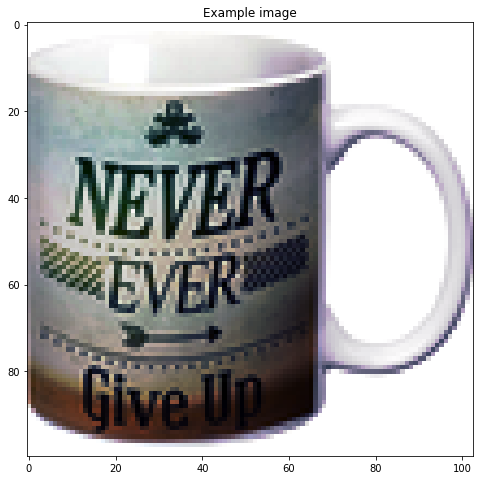

In [69]:
fig, axis = plt.subplots(1, 1, figsize=(8, 8))
plt.imshow(img, cmap="gray")
plt.title("Example image")
plt.show()

In [70]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[68].style.display = 'none';  
   document.getElementsByClassName("input")[69].style.display = 'none'; 
</script>"""))

From it we find the descriptors with the three methods.

In [71]:
# Change the array into image for treatment
img = np.array(img)

# Get descriptors and keypoints
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=1500)
keypoints_sift, desc_sift = sift.detectAndCompute(img, None)
keypoints_surf, desc_surf = surf.detectAndCompute(img, None)
keypoints_orb, desc_orb = orb.detectAndCompute(img, None)

We can see them printed over the pictures.

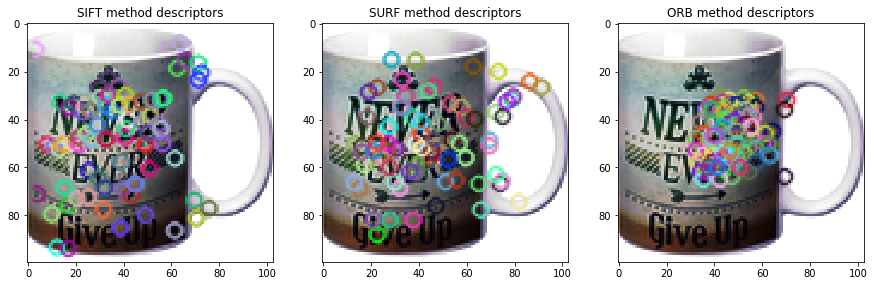

In [72]:
# print pictures
img_sift = cv2.drawKeypoints(img, keypoints_sift, None) 
img_surf = cv2.drawKeypoints(img, keypoints_surf, None) 
img_orb = cv2.drawKeypoints(img, keypoints_orb, None) 

plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.imshow(img_sift, cmap="gray")
plt.title("SIFT method descriptors")

plt.subplot(1, 3, 2)
plt.imshow(img_surf, cmap="gray")
plt.title("SURF method descriptors")

plt.subplot(1, 3, 3)
plt.imshow(img_orb, cmap="gray")
plt.title("ORB method descriptors")

plt.show()

In [73]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[71].style.display = 'none';  
   document.getElementsByClassName("input")[72].style.display = 'none';  
</script>"""))

Depending on the method, it is not the same points which are noticed as interesting. Even if the descriptors are stored as frequency of the gradient around the keypoints, we can have a look  at the cells around descriptors.

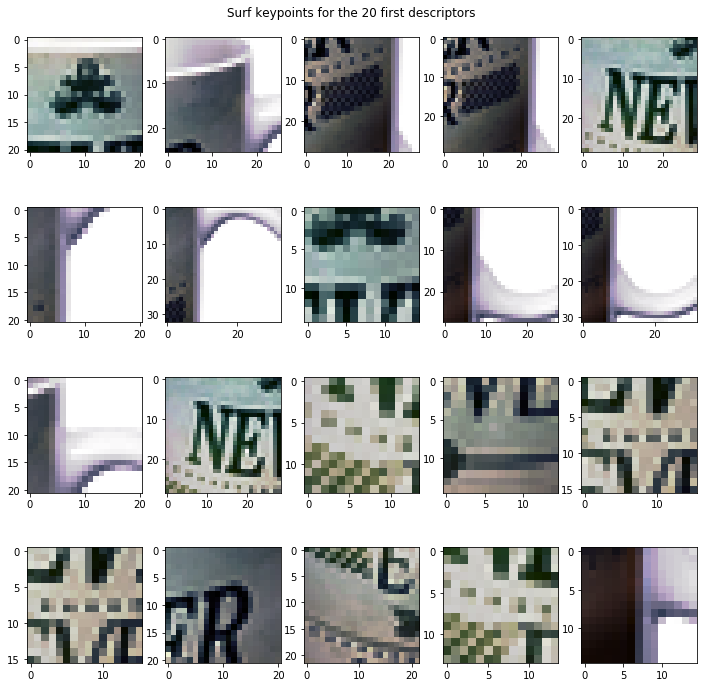

In [74]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle("Surf keypoints for the 20 first descriptors", y=0.90)

for i, kp in enumerate(keypoints_surf[0:20]):
    # Get the coordinates of the center and size
    plt.subplot(4, 5, i + 1)
    x_center = kp.pt[0]
    y_center = kp.pt[1]
    size = kp.size

    # Set the bordel limits
    left = ceil(x_center - size / 2)
    upper = ceil(y_center + size / 2)
    right = ceil(x_center + size / 2)
    lower = ceil(y_center - size / 2)

    # Crop the image and show the parts
    cropped_np = np.array(img)[lower:upper, left:right]
    plt.imshow(cropped_np, cmap="gray")
plt.show()

In [75]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[73].style.display = 'none'; 
   document.getElementsByClassName("input")[74].style.display = 'none';  
</script>"""))

We can visualize the descriptors focused to the inscriptions on the product. The descriptors have different length in function of the methods.

In [76]:
print("SIFT : {} descriptors of {} features".format(desc_sift.shape[0],
                                                    desc_sift.shape[1]))
print("SURF : {} descriptors of {} features".format(desc_surf.shape[0],
                                                    desc_surf.shape[1]))
print("ORB : {} descriptors of {} features".format(desc_orb.shape[0],
                                                    desc_orb.shape[1]))

SIFT : 98 descriptors of 128 features
SURF : 78 descriptors of 64 features
ORB : 88 descriptors of 32 features


These are the descriptors for a single image. Let's get all of them for all the pictures.

<font size="+1"> <b> Process with all images </b></font>

We store the descriptors into 3 different DataFrame data_sift, data_surf, data_orb in order to be able to compare the efficiency of the different methods. We do this for the train data set and the testing one.

In [77]:
def get_desc(df_input, df_result, method_create, col_name):
    """ Takes images and a method and returns all the descriptors.
    
    Takes a dataframe containing a column image with images to exploit. The 
    method is the function sift, surf or orb to call. The function takes the 
    result table and add the column of descriptors under the name col_name.
    
    df_input : DataFrame with "image" columns with images objects
    df_result : DataFrame to store the results
    method_create : "cv2.xfeatures2d.SIFT_create"
                    "cv2.xfeatures2d.SURF_create"
                    "cv2.ORB_create"
    col_name : Name of the column where to store the results.
    
    """
    
    # Get method to create xfeatures2d objects
    function_string = method_create
    mod_name_create, func_name_create = function_string.rsplit('.',1)
    mod_create = importlib.import_module(mod_name_create)

    for ind in df_input.index:
        # Get the image
        img = df_input.loc[ind, "image"]
        img = np.array(img)  

        # Get descriptors
        func = getattr(mod_create, func_name_create)()
        key, desc = func.detectAndCompute(img, None)

        # Store the results
        df_result.loc[ind, col_name] = desc

In [78]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[76].style.display = 'none';  
   document.getElementsByClassName("input")[77].style.display = 'none'; 
</script>"""))

In [79]:
# DataFrame to store the tables of descriptors
data_desc = pd.DataFrame(columns=["Desc_SIFT", "Desc_SURF", "Desc_ORB"])
data_desc_test = pd.DataFrame(columns=["Desc_SIFT", "Desc_SURF", "Desc_ORB"])

# Get descriptors for the 3 methods for training and testing set
get_desc(data, data_desc, "cv2.xfeatures2d.SIFT_create", "Desc_SIFT")
get_desc(data_test, data_desc_test, "cv2.xfeatures2d.SIFT_create", "Desc_SIFT")

get_desc(data, data_desc, "cv2.xfeatures2d.SURF_create","Desc_SURF")
get_desc(data_test, data_desc_test, "cv2.xfeatures2d.SURF_create", "Desc_SURF")

get_desc(data, data_desc, "cv2.ORB_create", "Desc_ORB")
get_desc(data_test, data_desc_test, "cv2.ORB_create", "Desc_ORB")

# Put all the descriptors in the main training and testing dataframe
data[["Desc_SIFT", "Desc_SURF", "Desc_ORB"]] = data_desc
data_test[["Desc_SIFT", "Desc_SURF", "Desc_ORB"]] = data_desc_test

For each image the descriptors are stored under a table with some rows for the amount of descriptors, and some columns corresponding to the descriptor features. The number descriptors features is unique per method and different for all methods. To use these data we have to take the arrays contained in each DataFrame cell and enqueue them in a numpy. Each rows will be not an image anymore, but a descriptor. We add the image index  in the table to get a link between the descriptors and images. The operation is done with the testing and training set.

In [80]:
def list_desc(df, col_name):
    """ Takes a table and a column of descriptors and list them in numpy.
    
    Takes in input a DataFrame and its column name. The column should contain 
    for each cell, a descriptor array. Takes all the descriptors and concatenate
    them one under each other to have a unique table np_desc. The second table 
    created is a single dimensional one listing the index of the images 
    corresponding to the listed descriptors. this is done in order to be able to
    knows from where they come from. This second table returned is np_index_img.
     
    """
    
    # Set into a good shape the empty descriptors
    size = df.loc[0, col_name].shape[1]
    for ind in df.loc[df[col_name].isnull()].index:
        df.loc[ind, col_name] = np.zeros((1, size))
    
    # List all descriptors into one array
    np_desc = np.concatenate(np.array(df[col_name]))

    # List the images associated
    np_index_img = []
    for ind in df.index:
        index_img = np.full(df.loc[ind, col_name].shape[0], ind)
        np_index_img = np.append(np_index_img, index_img)
    
    return np_desc, np_index_img

In [81]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[79].style.display = 'none'; 
   document.getElementsByClassName("input")[80].style.display = 'none';  
</script>"""))

In [82]:
np_desc_sift, np_index_img_sift = list_desc(data, "Desc_SIFT")
np_desc_surf, np_index_img_surf = list_desc(data, "Desc_SURF")
np_desc_orb, np_index_img_orb = list_desc(data, "Desc_ORB")

np_desc_sift_test, np_index_img_sift_test = list_desc(data_test, "Desc_SIFT")
np_desc_surf_test, np_index_img_surf_test = list_desc(data_test, "Desc_SURF")
np_desc_orb_test, np_index_img_orb_test = list_desc(data_test, "Desc_ORB")

We can get the total number of descriptors

In [83]:
print("SIFT : {} descriptors of {} features".format(np_desc_sift.shape[0],
                                                    np_desc_sift.shape[1]))
print("SURF : {} descriptors of {} features".format(np_desc_surf.shape[0],
                                                    np_desc_surf.shape[1]))
print("ORB : {} descriptors of {} features".format(np_desc_orb.shape[0],
                                                    np_desc_orb.shape[1]))

SIFT : 33131 descriptors of 128 features
SURF : 31999 descriptors of 64 features
ORB : 38041 descriptors of 32 features


For our set of 628 images the mean number of descriptors per images is 50.

## K-means to create a Bag of Features

We can do an unsupervised clustering of all our descriptors. All the descriptors with many dimensions can be plot in a mutli-dimensional area. We use a k-means method to regroup them into clusters accordingly to their relative distances. This will regroup the descriptors into sets of similar element of picture. It will show global part of articles that can appear in different pictures. To find number of clusters, we compute with different number possible and find the one which maximize the silhouette score. This score is high if the distances between points into clusters are low and distances between the different clusters high. The clustering is done with the training set. The testing set clustering is done with a prediction from the training set clustering.

In [84]:
def kmean_desc(np_desc, np_index_img, np_desc_test, np_index_img_test, Ks, method):
    """ Makes k-mean clustering and return training and testing prediction.
    
    Takes numpy arrays of descriptors for the training and testing set, np_desc 
    and np_desc_test. Takes also the index of images numpy arrays np_index_img 
    np_index_img_test for both sets. Computes the kmeans with the different K
    in Ks array and returns a dataframe with the best solutions. This is done 
    for each method so in input the last argument is "SIFT", "SURF", or "ORB".
    The result dataframe has one column with index of images for each descriptor,
    and one column with the number of clusters.
    
    """
    
    # Train and Test result set initilization 
    silouette = []
    result = pd.DataFrame()
    result["image_index"] = np_index_img
    result_test = pd.DataFrame()
    result_test["image_index"] = np_index_img_test
    
    
    # Change type to void kmeans crashes
    np_desc = np_desc.astype(np.float64)
    np_desc_test = np_desc_test.astype(np.float64)
    
    
    for K in Ks:
        # Define paths to save results
        file_res = "temp/result" + method + str(K) + ".csv"
        file_test = "temp/result" + method + str(K) + "_test.csv"
        file_sil = "temp/silhouette" + method + str(K) + ".csv"
        col = str(K) + "words"
        path_res = Path(file_res)
        path_test = Path(file_res)        
        path_sil = Path(file_res)        
        
        # Check if we compute and save, or upload from file
        present = (path_res.is_file() & path_test.is_file() & path_sil.is_file())
        if (not present) or compute:
            # Find the clusters
            kmeans = MiniBatchKMeans(n_clusters=K).fit(np_desc)  # takes 5 minutes
            #kmeans = KMeans(n_clusters=K, algorithm='full').fit(np_desc)  # takes 18 hours
            
            # Save results in the dataframe and Get the score
            result[col] = kmeans.labels_
            result_test[col] = kmeans.predict(np_desc_test)
            score = silhouette_score(np_desc, kmeans.labels_, sample_size=5000)
            
            # Save in files
            result[["image_index", col]].to_csv(file_res, index=False)
            result_test[["image_index", col]].to_csv(file_test, index=False)
            df_sil = pd.DataFrame([[score]], columns={"silhouette"})
            df_sil.to_csv(file_sil, index=False)
        else:
            # Restore from files if necessary
            result[["image_index", col]] = pd.read_csv(file_res)
            result_test[["image_index", col]] = pd.read_csv(file_test)
            df_silouette = pd.read_csv(file_sil)
            score = float(df_silouette["silhouette"].values)                
        silouette.append(score)

    # Keep only the best one
    best_score = max(silouette)
    best_K = Ks[np.array(silouette) == best_score]
    best_K = int(best_K)
    best = result[["image_index", str(best_K) + "words"]].dropna().applymap(int)
    best = best.rename(columns={str(best_K) + "words":"visual_word"})
    best_test = result_test[["image_index", str(best_K) + "words"]].dropna()\
    .applymap(int)
    best_test = best_test.rename(columns={str(best_K) + "words":"visual_word"})
    
    return best, best_test, best_K, best_score

In [85]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[83].style.display = 'none';  
   document.getElementsByClassName("input")[84].style.display = 'none';
</script>"""))

The clustering is done in quite four hours. So it has been chosen to save the results of the clustering to not have to compute every time. If the result files do not exist, the clustering will run. If they exist, the clustering will be done and files overwritten only if the variable compute is set to True.

In [86]:
# If true, force to compute even if the file is present
compute = False

We have 28 categories and a mean of 50 descriptors per image. We assume the categories to have an order of magnitude of 50 main descriptive features. That means we search the best number of cluster between 0 and 1500.

In [87]:
words_cat = 50
nb_cat = len(data["cat2use"].unique())
Ks = np.logspace(log(nb_cat, 10), log(words_cat * nb_cat, 10), 20).astype(int)
print("Ks: ", Ks)

result_sift, result_sift_test, K_sift, score_sift \
= kmean_desc(np_desc_sift, np_index_img_sift, 
             np_desc_sift_test, np_index_img_sift_test, Ks, "SIFT")

result_surf, result_surf_test, K_surf, score_surf \
= kmean_desc(np_desc_surf, np_index_img_surf, 
             np_desc_surf_test, np_index_img_surf_test, Ks, "SURF")

result_orb, result_orb_test, K_orb, score_orb \
= kmean_desc(np_desc_orb, np_index_img_orb, 
             np_desc_orb_test, np_index_img_orb_test, Ks, "ORB")

Ks:  [  27   34   42   51   63   78   96  118  145  178  219  269  331  407
  500  614  754  927 1139 1399]


In [88]:
print("Sift silhouette score : {:.4f}".format(float(score_sift)))
print("Surf silhouette score : {:.4f}".format(float(score_surf)))
print("Orb silhouette score : {:.4f}".format(float(score_orb)))

Sift silhouette score : 0.0456
Surf silhouette score : 0.1014
Orb silhouette score : 0.0335


The silhouette scores are far from 1, so they are not that good. That means the clusters don't  separate well visual words. We can visualize this for 5 of those words for the SIFT method with a projection of the descriptors in a two dimensional plan. This is done with TSNE method.

In [89]:
tsne = TSNE(n_jobs=4)
desc_embedded = tsne.fit_transform(np_desc_sift)

We can confirm the dimensionality reduction from 128 to 2 for the SIFT descriptor.

In [90]:
desc_embedded.shape

(33131, 2)

For the 5 first clusters we find the descriptors position, the cluster in which it is, and the image index corresponding.

In [91]:
clust_to_show = 5

# We take data from the first cluster.
image = np_index_img_sift
desc_show = desc_embedded[result_sift["visual_word"] == 0]
clust_show = np.full((desc_show).shape[0], 0)
labels_show = image[result_sift["visual_word"] == 0]
# Takes then only the 10 first clusters
for clust in range(1, clust_to_show):
    kmeans_label = result_sift["visual_word"]
    positions = desc_embedded[kmeans_label == clust]
    desc_show = np.concatenate((desc_show, positions))
    clust_show = np.concatenate((clust_show, np.full(len(positions), clust)))
    labels_show = np.concatenate((labels_show, image[kmeans_label == clust]))

In [92]:
len(np.unique(labels_show))

488

In the figure the points are the different descriptors and the 5 different colors are the 5 first visual words.

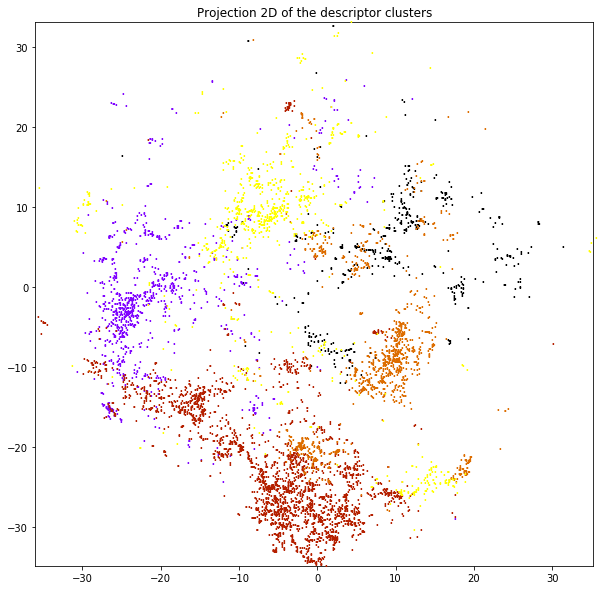

In [93]:
# color
number = clust_to_show
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

plt.figure(figsize=(10, 10))
plt.title("Projection 2D of the descriptor clusters")
plt.axis([min(desc_show[:,0]), max(desc_show[:,0]), 
          min(desc_show[:,1]), max(desc_show[:,1])])

# Plot of the points
for i in range(len(clust_show)):
    text = str(int(labels_show[i]))
    text = "."
    plt.text(desc_show[i][0], desc_show[i][1], text, fontsize=15, 
             color=colors[clust_show[i]])
plt.show()

In [94]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[92].style.display = 'none';  
   document.getElementsByClassName("input")[93].style.display = 'none'; 
</script>"""))

We can see the regrouping of descriptors from many pictures. With this clustering we can create our bag of visual words. For each picture we store now the proportion of each visual word. For that we create bags of features DataFrames where each column will be a visual word, and each row will be the image. This is done for each method and for the training set and testing set.

In [95]:
def bag_feature(result, K):
    """Create a bag of features from the result of the kmeans clustering
    
    Takes the DataFrame resulting of the kmeans function and the number of 
    visual word. Creates a DataFrame gab of visual words where each column is
    a cluster, and each row correspond to an image. The data are the number of 
    occurrences of descriptors in each cluster. They are normalized before 
    being returned.
    
    """
    # Create the bag of feature
    col_feature = list([str(i) for i in range(K)])
    bag_features = pd.DataFrame(columns=col_feature)
    for ind, image in enumerate(result["image_index"].unique()):
        v_word = result.loc[result["image_index"] == image, "visual_word"]
        unique, counts = np.unique(np.array(v_word), return_counts=True)
        bag_features.loc[ind, [str(i) for i in unique]] = counts
    bag_features = bag_features.fillna(0)
    
    # normalize
    std_scale = preprocessing.StandardScaler().fit(bag_features)
    bag_features = std_scale.transform(bag_features)
    
    return bag_features

In [96]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[94].style.display = 'none';  
   document.getElementsByClassName("input")[95].style.display = 'none';  
</script>"""))

In [97]:
bag_sift = bag_feature(result_sift, K_sift)
bag_sift_test = bag_feature(result_sift_test, K_sift)

bag_surf = bag_feature(result_surf, K_surf)
bag_surf_test = bag_feature(result_surf_test, K_surf)

bag_orb = bag_feature(result_orb, K_orb)
bag_orb_test = bag_feature(result_orb_test, K_orb)

In [98]:
print("Shape of the bag of visual words for SIFT : {}"
      .format(bag_sift.shape))
print("Shape of the bag of visual words for SURF : {}"
      .format(bag_surf.shape))
print("Shape of the bag of visual words for ORB : {}"
      .format(bag_orb.shape))

Shape of the bag of visual words for SIFT : (489, 34)
Shape of the bag of visual words for SURF : (489, 34)
Shape of the bag of visual words for ORB : (489, 27)


The resulting bags of features have 35 image words.

# Predictions

To perform the prediction we use different models. We compare the performances each time with K-NN, Logistic classifier, Random Forest classifier, Naives bayes and Neural network. We also compare the different results given if we truncate the categorical tree at levels lower than 4.

## KNN 

The first one used is the k-nearest neighbors algorithm (K-NN). We plot the different articles of the bag of features in a multi-dimensional area. The products of the training set are labelled with a category. For each product in the testing set we will look at the K neighbors articles and associate to it the main category. To find the best K which doesn't over-fit too much the data we try with many ones from 2 to 15.

For that we use a cross validation on the training set to avoid over-fitting. 1 over 6 part of the set is used each time as testing set. Like this each data serves one time and only one as testing point. Then, when the best number of neighbors is found, we use the testing set to find a robust evaluation of the model mean error.

In [99]:
def cv_knn(bag_feature, number_Ktest):
    """ Do a cross validation K-NN on the bag of feature.
    
    Takes the bag of feature, and a number of K neighbors to try. It performs
    from 2 to the number_Ktest classifications. On each of these
    classification a cross validation is done dividing the set in 6 parts. 
    The function returns the percentage of error for each number of neighbors.
    
    """
    # Get the testing and training points and labels
    X = bag_feature
    y = data["cat2use"]
    
    # Search best Cross validation fit
    model = neighbors.KNeighborsClassifier()
    grid_parameters = {'n_neighbors':range(2, number_Ktest)}
    clf = GridSearchCV(model, grid_parameters, cv=6) 
    clf.fit(X, y)
    
    return (100 * (1 - clf.cv_results_['mean_test_score']))

In [100]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[98].style.display = 'none';  
   document.getElementsByClassName("input")[99].style.display = 'none'; 
</script>"""))

We run all the K neighbors between 2 and 15. The best method is the one giving the lowest errors for cross validations with all the 4 categories.

In [101]:
nb_K = 10
cat = 3

# Use the 3 categories
data["cat2use"] = ""
data_test["cat2use"] = ""
for i in range(1, cat + 1):
    data["cat2use"] = data["cat2use"] + data["cat" + str(i)]
    data_test["cat2use"] = data_test["cat2use"] + data_test["cat" + str(i)]

# Compute the errors
errors_sift = cv_knn(bag_sift, nb_K)
errors_surf = cv_knn(bag_surf, nb_K)
errors_orb = cv_knn(bag_orb, nb_K)
errors_word = cv_knn(bag_word, nb_K)
errors_word_tf = cv_knn(bag_word_tf, nb_K)

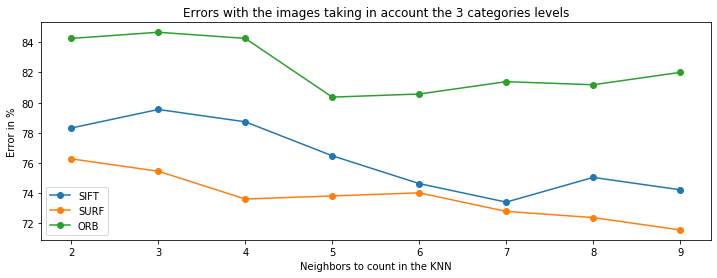

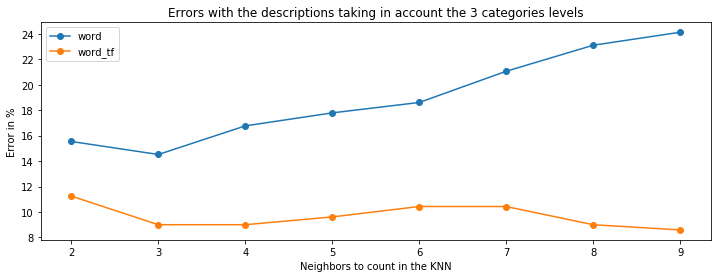

In [102]:
plt.figure(figsize=(12, 4))
plt.plot(range(2, nb_K), errors_sift, 'o-', label='SIFT')
plt.plot(range(2, nb_K), errors_surf, 'o-', label='SURF')
plt.plot(range(2, nb_K), errors_orb, 'o-', label='ORB')
plt.title("Errors with the images taking in account the {} categories levels"
          .format(cat))
plt.ylabel("Error in %")
plt.xlabel("Neighbors to count in the KNN")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(2, nb_K), errors_word, 'o-', label='word')
plt.plot(range(2, nb_K), errors_word_tf, 'o-', label='word_tf')
plt.title("Errors with the descriptions taking in account the {} categories \
levels".format(cat))
plt.ylabel("Error in %")
plt.xlabel("Neighbors to count in the KNN")
plt.legend()
plt.show()

In [103]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[101].style.display = 'none';  
   document.getElementsByClassName("input")[102].style.display = 'none';
</script>"""))

With the lowest number of neighbors for each categories we can compare the efficiency of the different methods. The same is done with the level of categories 1 to 4.

In [104]:
def compute(bag_feature, bag_feature_test, function, parameters):
    """ From a training and testing bag of feature makes the predictions.
    
    The classifiers are sent in input under function argument, and the 
    parameters are sent in a dictionary in the last argument. The score is 
    computed and the percentage or error returned.
    
    """
    # Get the testing and training points and labels
    xtrain = bag_feature
    ytrain = data.loc[0:xtrain.shape[0] - 1, "cat2use"]
    xtest = bag_feature_test
    ytest = data_test.loc[0:xtest.shape[0] - 1, "cat2use"]
    
    clf = function(**parameters)
    clf.fit(xtrain, ytrain)
    error = clf.score(xtest, ytest)

    return (1 - error) * 100

In [105]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[103].style.display = 'none'; 
   document.getElementsByClassName("input")[104].style.display = 'none';  
</script>"""))

In [106]:
def plot_error(errors, mod, nb_cat):
    """Plot the array error sent, with the qualifier string mod in the title"""
    
    plt.figure(figsize=(12, 4))
    plt.plot(range(1, nb_cat + 1), errors["sift"], label='SIFT')
    plt.plot(range(1, nb_cat + 1), errors["surf"], label='SURF')
    plt.plot(range(1, nb_cat + 1), errors["orb"], label='ORB')
    plt.plot(range(1, nb_cat + 1), errors["word"], label='word')
    plt.plot(range(1, nb_cat + 1), errors["word_tf"], label='word_tf')
    plt.title("Errors with {} taking in account the categorical levels"
              .format(mod))
    plt.ylabel("Error in %")
    plt.xlabel("Level of category threshold")
    plt.xticks(range(1, nb_cat + 1))
    plt.legend(loc='upper right')
    plt.show()

In [107]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[105].style.display = 'none'; 
   document.getElementsByClassName("input")[106].style.display = 'none'; 
</script>"""))

We now compute and plot all the errors for each categorical level threshold, and all methods with texts and images. This is done with the best number of neighbors found.

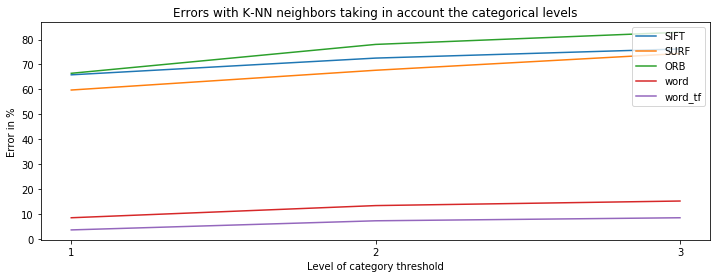

In [108]:
# define the number of neighbors giving the less errors on cross validation tests
k_sift = range(2, nb_K)[np.argmin(errors_sift)]
k_surf = range(2, nb_K)[np.argmin(errors_surf)]
k_orb = range(2, nb_K)[np.argmin(errors_orb)]
k_word = range(2, nb_K)[np.argmin(errors_word)]
k_word_tf = range(2, nb_K)[np.argmin(errors_word_tf)]

# Initialize the results tabs for all categories
errors = pd.DataFrame(columns=["sift", "surf", "orb", "word", "word_tf"])
knn_func =  neighbors.KNeighborsClassifier

data["cat2use"] = ""
data_test["cat2use"] = ""
for category in range(1, cat + 1):

    data["cat2use"] = data["cat2use"] + data["cat" + str(category)]
    data_test["cat2use"] = data_test["cat2use"] + data_test["cat" + str(category)]
    
    errors.loc[category, "sift"] = compute(bag_sift, bag_sift_test, 
                                      knn_func, {'n_neighbors':k_sift})
    errors.loc[category, "surf"] = compute(bag_surf, bag_surf_test, 
                                      knn_func, {'n_neighbors':k_surf})
    errors.loc[category, "orb"] = compute(bag_orb, bag_orb_test, 
                                     knn_func, {'n_neighbors':k_orb})
    errors.loc[category, "word"] = compute(bag_word, bag_word_test, 
                                      knn_func, {'n_neighbors':k_word})
    errors.loc[category, "word_tf"] = compute(bag_word_tf, bag_word_tf_test, 
                                         knn_func, {'n_neighbors':k_word_tf})

plot_error(errors, "K-NN neighbors", cat)

We can relate a huge difference between the text and image predictions. The texts gives from 0 to 18% of errors versus 60% or 80% for the images. The ORB and SIFT methods are better than the SURF one. Nevertheless the SIFT method is the only one to have differences and worst result when taking in account only the first level of category.

## Logistic regressor

We can do the same process for different methods. 

In [109]:
def errors_model(func, param, nb_cat):
    """ Compute and plot the errors for each method 
    
    Takes a function and parameters associated. Runs this method overs each bags
    of features and each category level. Then plot the result.
    
    """
    errors = pd.DataFrame(columns=["sift", "surf", "orb", "word", "word_tf"])

    data["cat2use"] = ""
    data_test["cat2use"] = ""
    for cat in range(1, nb_cat + 1):
        data["cat2use"] = data["cat2use"] + data["cat" + str(cat)]
        data_test["cat2use"] = data_test["cat2use"] + data_test["cat" + str(cat)]

        errors.loc[cat, "sift"] = compute(bag_sift, bag_sift_test, func, param)
        errors.loc[cat, "surf"] = compute(bag_surf, bag_surf_test, func, param)
        errors.loc[cat, "orb"] = compute(bag_orb, bag_orb_test, func, param)
        errors.loc[cat, "word"] = compute(bag_word, bag_word_test, func, param)
        errors.loc[cat, "word_tf"] = compute(bag_word_tf, bag_word_tf_test, func,
                                             param)    
        
    return errors

In [110]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[108].style.display = 'none';  
   document.getElementsByClassName("input")[109].style.display = 'none'; 
</script>"""))

In [111]:
func = LogisticRegression
parameters = {'solver':'lbfgs', 'multi_class':'multinomial'}
errors = errors_model(func, parameters, cat)

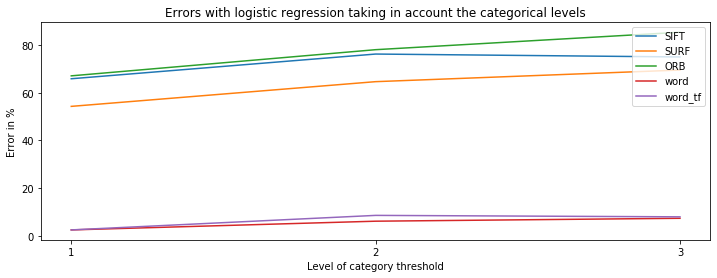

In [112]:
plot_error(errors, "logistic regression", cat)

The logistic regression gives inverse results for the bag of words, the bag of visual words are worst. 

## Random forest classifier

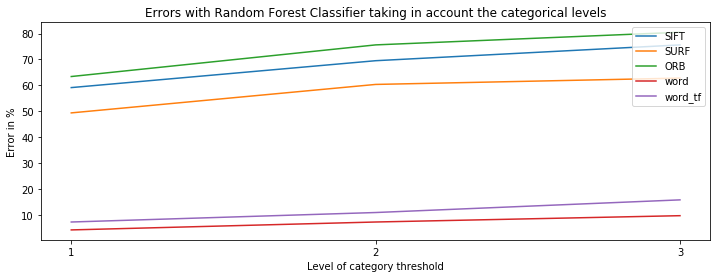

In [113]:
func = RandomForestClassifier
parameters = {'n_estimators':300}
errors = errors_model(func, parameters, cat)
plot_error(errors, "Random Forest Classifier", cat)

The random forest gives quite the same results as the logistic regression, but the descriptions are a bit worse.

## GaussianNB Naives bayes

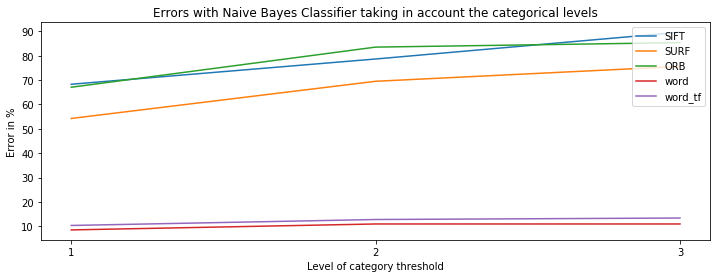

In [114]:
func = GaussianNB
parameters = {}
errors = errors_model(func, parameters, cat)
plot_error(errors, "Naive Bayes Classifier", cat)

The gaussian naives bayes classification gives also the same results as the random forest, but with no differences between the image methods and word methods.

## Neural network

In [115]:
func = MLPClassifier
parameters = {"alpha":1, "max_iter":1000}
errors = errors_model(func, parameters, cat)

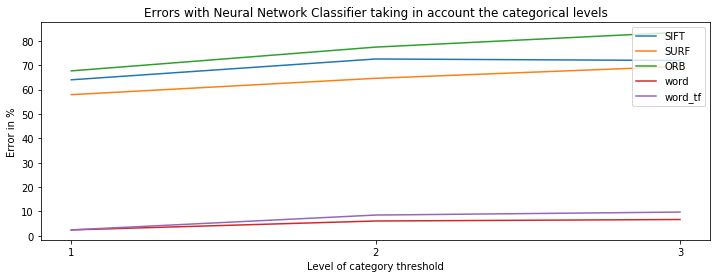

In [116]:
plot_error(errors, "Neural Network Classifier", cat)

We can display the error table to have more precise values.

In [117]:
errors

,sift,surf,orb,word,word_tf
1,64.0244,57.9268,67.6829,2.43902,2.43902
2,72.561,64.6341,77.439,6.09756,8.53659
3,71.9512,69.5122,83.5366,6.70732,9.7561


For the simple neural network,the errors with the testing set fall to 0 for word bag of word, and 2.27% for the TF-idf one. The predictions for the first category makes no mistakes.

In conclusion with our small data set we can expect a mean error of 0% with the descriptions and quite 60% for the images. It is not sufficient, but we can assume this is due to the sample of images too small. 

# Get further with ebay API

A solution to get more data is to use an Amazon API to get the corresponding categories and download huger sample of data for the training set. We got the keys to make it. (do not worry they are useless here) We also make an example of API to extract the images urls. The categories are here identified with one number to enter as root_ids index.

from amazon.api import AmazonAPI<br>

AMAZON_ACCESS_KEY = ""<br>
AMAZON_SECRET_KEY = ""<br>
AMAZON_ASSOC_TAG = ""<br>

amazon = AmazonAPI(AMAZON_ACCESS_KEY, AMAZON_SECRET_KEY, AMAZON_ASSOC_TAG)<br>
api = API(locale='uk')<br>
result = api.item_search(BrowseNode=0)<br>
for item in result:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;print item.ItemAttributes.Title, item.large_image_url<br>

Unfortunately getting keys is not sufficient to run Amazon API, we need an authorization. This is given only if we have a website and begin so sell at least three products. An other solution is to perform the training set with ebay API. The categories are not the same, but it can show the possibilities of categorical recognition with a lot of images and a lot of categories. We got the keys to test it.

We found a file listing the identifier of each ebay categories. It has been found at https://pics.ebay.com/aw/pics/pdf/us/file_exchange/CategoryIDs-US.csv. We can list the first rows.

In [118]:
ebay = pd.read_csv("input/CategoryIDs-US.csv")
ebay.head() 

,CategoryID,Category Path
0,37908,Antiques > Antiquities > The Americas
1,162922,Antiques > Antiquities > Byzantine
2,162923,Antiques > Antiquities > Celtic
3,37905,Antiques > Antiquities > Egyptian
4,162916,Antiques > Antiquities > Far Eastern


The categories are not the same than the one we use, so it will be necessary to make a conversion file from our categories to ebay ones. We can do example of image download with ebay API, for the category 3938, watches. 

In [119]:
cat_id = str(3938)

try:
    api = Connection(appid='DavidMil-Placedem-PRD-3dc07dec5-5851e986', 
                     config_file=None)
    response = api.execute('findItemsAdvanced', {'categoryId' : [cat_id],})

    assert(response.reply.ack == 'Success')
    assert(type(response.reply.timestamp) == datetime.datetime)
    assert(type(response.reply.searchResult.item) == list)

    item = response.reply.searchResult.item[0]
    assert(type(item.listingInfo.endTime) == datetime.datetime)
    assert(type(response.dict()) == dict)

except ConnectionError as e:
    print(e)
    print(e.response.dict())

We can list the 5 first results.

In [120]:
for item in response.reply.searchResult.item[0:5]:
    print("Article : {}".format(item.title))

Article : Bulova Men's Quartz Silver-Tone Stainless Steel Chain Pocket Watch 50mm 96B270
Article : Invicta Vintage 19674 Men's Black Stainless Steel Chronograph Stopwatch & Chain
Article : New York Souvenir Silver Toned Pocket Watch with Chain
Article : Vintage Design Steampunk Pocket Watch Quartz Pendant Necklace Men's Retro Gift
Article : Vintage Design Steampunk Pocket Watch Quartz Pendant Necklace Men's Retro Gift


They are mostly watches. Printing them can give an idea to the quality of images and similarities inside a category.

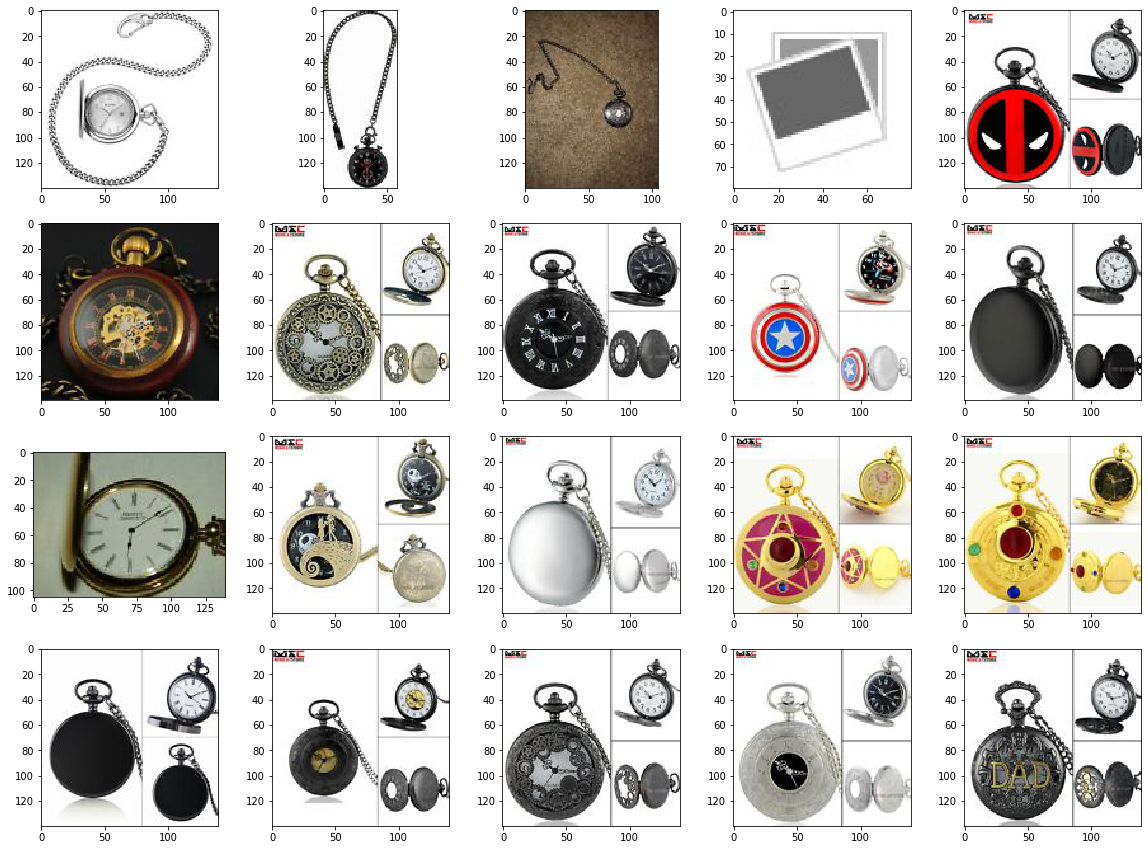

In [121]:
Image.MAX_IMAGE_PIXELS = 1000000000 
fig = plt.figure(figsize=(20, 15))

for i, item in enumerate(response.reply.searchResult.item[0:20]):
    url = item.galleryURL
    img = Image.open(requests.get(url, stream=True).raw)
    ax1 = fig.add_subplot(4, 5, i + 1)
    ax1.title.set_text('')
    ax1.imshow(img)

plt.show()

In [122]:
# Hide by default
display(HTML(""" <script> 
   document.getElementsByClassName("input")[120].style.display = 'none'; 
   document.getElementsByClassName("input")[121].style.display = 'none';
</script>"""))

The watches are somehow similar, but it is interesting to see that some images are missing. It will be necessary to remove them. Besides the API doesn't provide options to download text descriptions. So ebay API is an idea to enhance the feasibility model, but can improve only image classification.